# Telemetry

## Import libraries

In [1]:
import fastf1
import matplotlib.pyplot as plt
import pandas as pd
from telemetry_utils import *

In [2]:
# Load a specific race session
session = fastf1.get_session(2024, 'Brazil', 'R')  # 'R' indicates the race; can also use 'Q', 'FP1', 'FP2', 'FP3'
session.load()

req         WARNING 	DEFAULT CACHE ENABLED! (1.61 GB) /home/michail/.cache/fastf1


core           INFO 	Loading data for São Paulo Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2024/21/results.json failed; using cached response
Traceback (most recent call last):
  File "/home/michail/miniconda3/envs/f1_assistant/lib/python3.13/site-packages/urllib3/connectionpool.py", line 536, in _make_request
    response = conn.getresponse()
  File "/home/michail/miniconda3/envs/f1_assistant/lib/python3.13/site-packages/urllib3/connection.py", line 507, in getresponse
    httplib_response = super().getresponse()
  File "/home/michail/miniconda3/envs/f1_assistant/lib/python3.13/http/client.py", line 1428, in getresponse
    response.begin()
    ~~~~~~~~~~~~~~^^
  File "/home/michail/miniconda3/envs/f1_assistant/lib/python3.13/http/client.py", line 331, in begin
    version, status, reason = self._read_status()
                              ~~~~~~~~~~

## Comparison between drivers for specific lap

In [4]:
driver_laps = session.laps


# Get telemetry data for a specific lap
lap = driver_laps.pick_fastest()  # Pick the fastest lap of the driver
telemetry = lap.get_telemetry()  # Get telemetry for that lap

# Access speed, throttle, brake, etc.
speed = telemetry['Speed']
throttle = telemetry['Throttle']
brake = telemetry['Brake']

In [5]:
# Load a specific race session
session = fastf1.get_session(2024, 'Brazil', 'R')  # 'R' indicates the race; can also use 'Q', 'FP1', 'FP2', 'FP3'
session.load()

core           INFO 	Loading data for São Paulo Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2024/21/results.json failed; using cached response
Traceback (most recent call last):
  File "/home/michail/miniconda3/envs/f1_assistant/lib/python3.13/site-packages/urllib3/connectionpool.py", line 536, in _make_request
    response = conn.getresponse()
  File "/home/michail/miniconda3/envs/f1_assistant/lib/python3.13/site-packages/urllib3/connection.py", line 507, in getresponse
    httplib_response = super().getresponse()
  File "/home/michail/miniconda3/envs/f1_assistant/lib/python3.13/http/client.py", line 1428, in getresponse
    response.begin()
    ~~~~~~~~~~~~~~^^
  File "/home/michail/miniconda3/envs/f1_assistant/lib/python3.13/http/client.py", line 331, in begin
    version, status, reason = self._read_status()
                              ~~~~~~~~~~

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


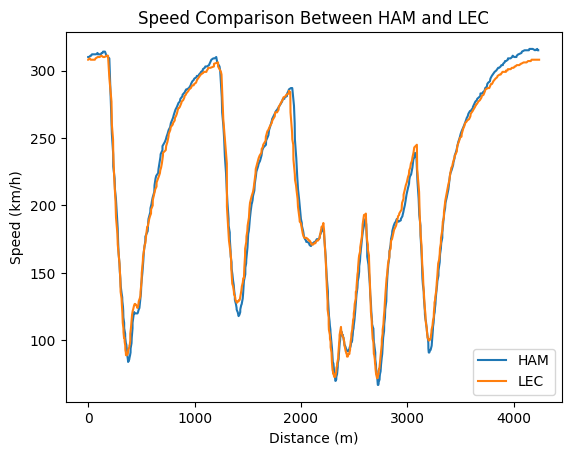

In [6]:
driver1 = session.laps.pick_drivers('HAM').pick_fastest()  # Pick fastest lap of driver 1
driver2 = session.laps.pick_drivers('LEC').pick_fastest()  # Pick fastest lap of driver 2

# Get telemetry for both drivers
telemetry_driver1 = driver1.get_telemetry()
telemetry_driver2 = driver2.get_telemetry()

# Plot a comparison (e.g., Speed)
plt.plot(telemetry_driver1['Distance'], telemetry_driver1['Speed'], label='HAM')
plt.plot(telemetry_driver2['Distance'], telemetry_driver2['Speed'], label='LEC')
plt.xlabel('Distance (m)')
plt.ylabel('Speed (km/h)')
plt.title('Speed Comparison Between HAM and LEC')
plt.legend()
plt.show()


In [7]:
telemetry_driver1.columns

Index(['Date', 'SessionTime', 'DriverAhead', 'DistanceToDriverAhead', 'Time',
       'RPM', 'Speed', 'nGear', 'Throttle', 'Brake', 'DRS', 'Source',
       'Distance', 'RelativeDistance', 'Status', 'X', 'Y', 'Z'],
      dtype='object')

**Available attributes**

['Date', 'SessionTime', 'DriverAhead', 'DistanceToDriverAhead', 'Time',
       'RPM', 'Speed', 'nGear', 'Throttle', 'Brake', 'DRS', 'Source',
       'Distance', 'RelativeDistance', 'Status', 'X', 'Y', 'Z']

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


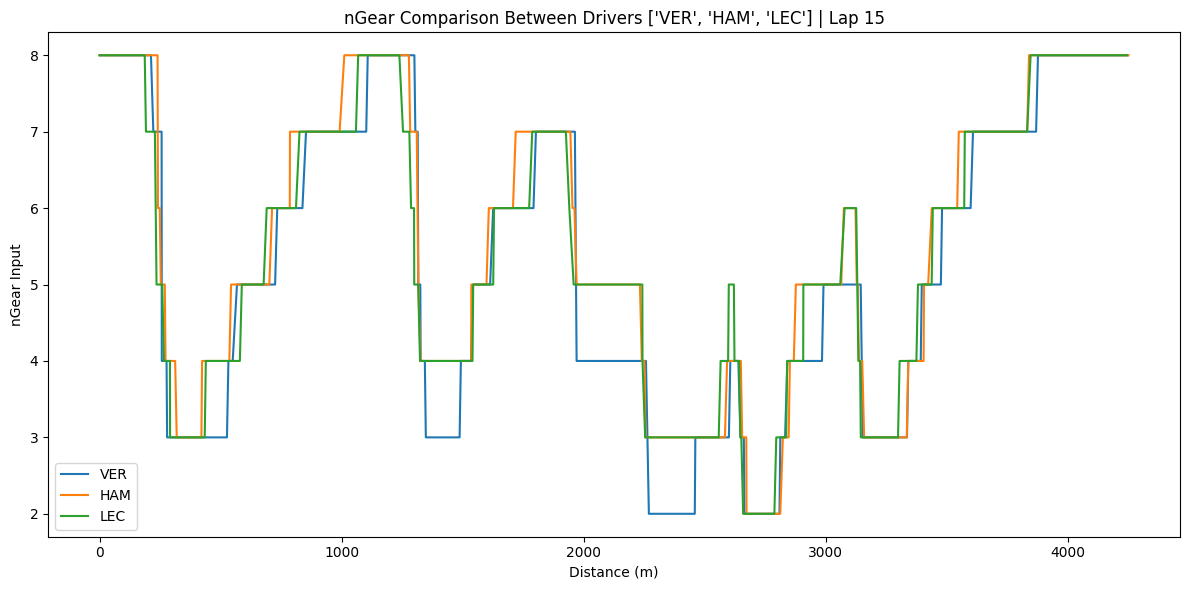

In [8]:
telemetry_attr_comparison(session=session, drivers_abbrs=['VER', 'HAM', 'LEC'], attr='nGear', lap=15)

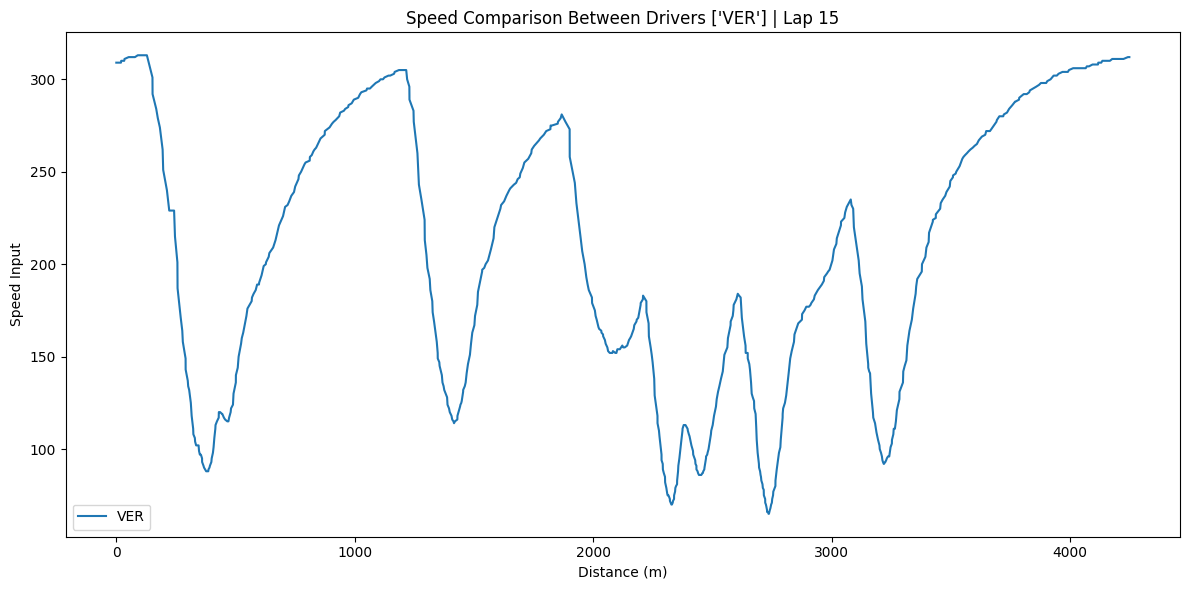

In [9]:
telemetry_attr_comparison(session=session, drivers_abbrs=['VER'], attr='Speed', lap=15)